In [1]:
import numpy as np
import matplotlib
from matplotlib import animation
from matplotlib import pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

# Value Iteration

In [2]:
def render_env(env):
    frame = env.render(mode='rgb_array')
    plt.axis('off')
    plt.imshow(frame)
    return frame

In [3]:
env = Maze()
initial_state = env.reset()

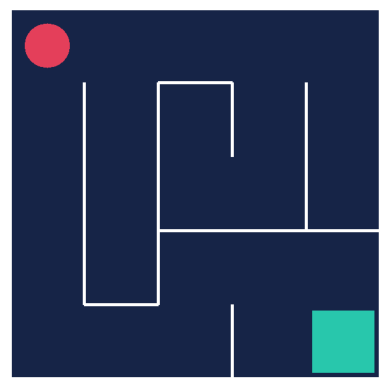

In [10]:
frame = render_env(env)

In [6]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


# Define the policy

### Create the policy

In [43]:
policy_probs = np.full((5, 5, 4), 0.25)

In [5]:
def policy(state):
    return policy_probs[state]

### Test the policy with state (0, 0)

In [9]:
action_probs = policy((0, 0))
for action, prob in zip(range(4), action_probs):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


### See how the random policy does in the maze

In [10]:
test_agent(env, policy, episodes=1)

### Plot the policy

In [20]:
policy_probs

array([[[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]]])

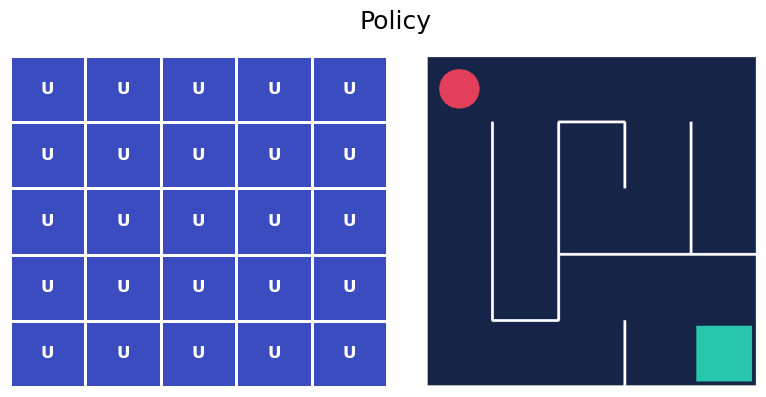

In [48]:
plot_policy(policy_probs, frame)

# Define value table

### Create the V(s) table

In [44]:
state_values = np.zeros(shape=(5, 5))

### Plot V(s)

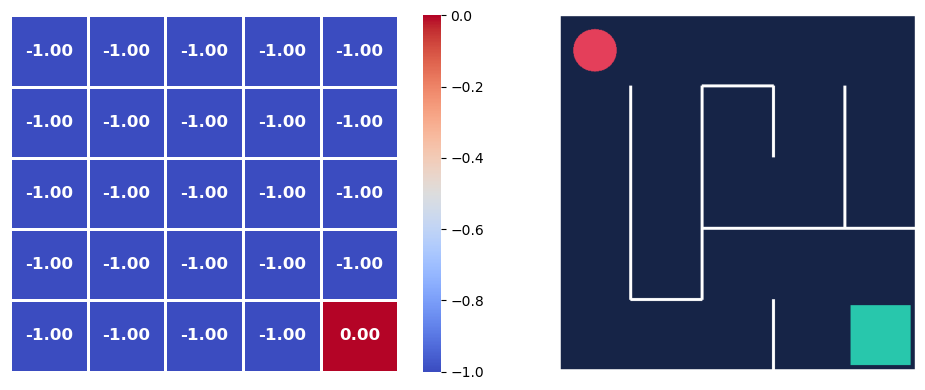

In [47]:
plot_values(state_values, frame)

### Implement the Value Iteration algorithm

In [49]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")

    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                action_probs = None
                max_qsa = float("-inf")

                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state]

                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.

                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs

                delta = max(delta, abs(max_qsa - old_value))

In [50]:
value_iteration(policy_probs, state_values)

# Show results

### Show resuling value table V(s)

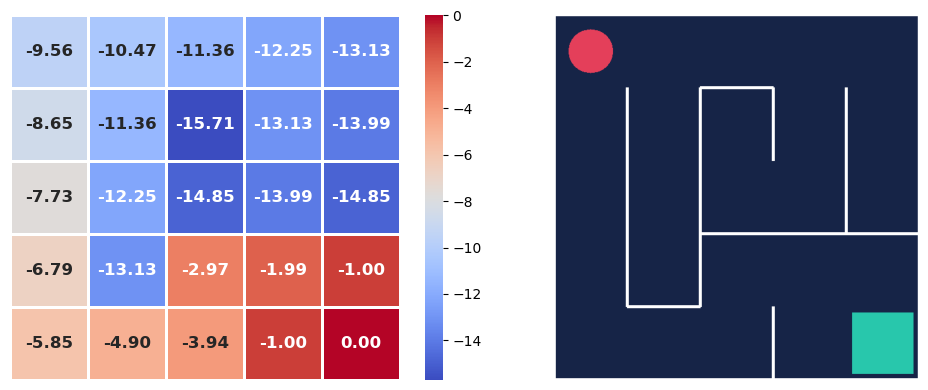

In [51]:
plot_values(state_values, frame)

### Show resulting policy

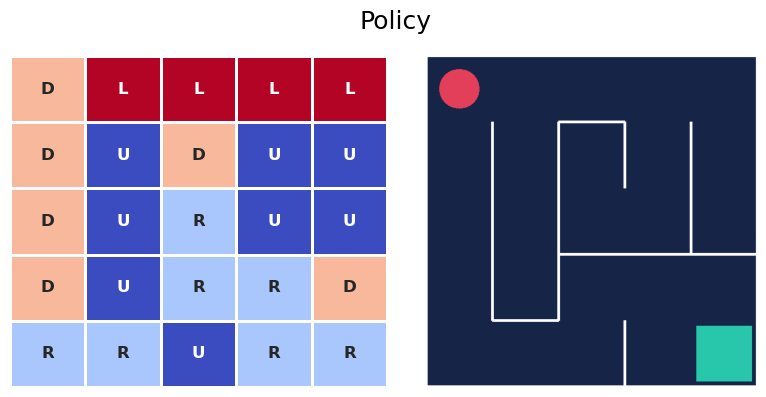

In [52]:
plot_policy(policy_probs, frame)

### Test the result agent

In [23]:
test_agent(env, policy, episodes=1)